<a href="https://colab.research.google.com/github/TakahiroDoi/risk-of-risk/blob/main/num_of_attacking_armies_you_need.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More detailed simulation for a good attack strategy
* Simulate the probability of each possible scenario of attack
* Parameters 
  * \# of opponent armies 
  * \# of my armies (range: \# of opponent armies+1: \# of opponent armies+10)
* Assume the attack is always done with three armies
* Attack ends when the territory is taken or the \# of attacking armies is reduced to the \# of opponent armies 
  
* Rule: https://www.hasbro.com/common/instruct/risk.pdf

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

In [91]:
num_trials  = 1000
num_opponent_armies = 3
num_my_armies = list(range(num_opponent_armies+1, num_opponent_armies+11))

In [92]:
def roll_dice(num_dice):
  """ Helper function: roll `num_dice` dice 

  Args:
      num_dice (int): number of dice rolled  

  Returns:
      list: sorted roll results (descending)    
  """
  my_rolls = np.random.randint(low=1,high=7,size=num_dice) # samples from [low, high)  
  return np.sort(my_rolls)[::-1]  # Descending order 

In [93]:
def simulate_single_attack(num_curr_my_armies, num_curr_op_armies):
  """ Helper function: simulate single attack event  

  Args:
      num_curr_my_armies (int): number of my aries (current)   
      num_curr_op_armies (int): number of opponent aries (current)   

  Returns:
      num_next_my_armies (int): number of my aries (after the attack)   
      num_next_op_armies (int): number of opponent aries (after the attack)   
  """
  # Assume always atacking with 3 dice 
  num_my_dice = 3
  my_rolls = roll_dice(num_my_dice)
   
  if num_curr_op_armies == 1: 
    num_op_dice = 1
    op_rolls = roll_dice(num_op_dice)
    my_rolls = my_rolls[0]
      
  else:
    num_op_dice = 2
    op_rolls = roll_dice(num_op_dice)
    my_rolls = my_rolls[0:2]

  num_my_wins = sum( (my_rolls - op_rolls)>0 )  
  num_op_wins = len(op_rolls) - num_my_wins

  num_next_op_armies = num_curr_op_armies - num_my_wins
  num_next_my_armies = num_curr_my_armies - num_op_wins

  debug = False
  if debug:
    print('\n-------------------')
    print('num_curr_my_armies: ', num_curr_my_armies)
    print('num_curr_op_armies: ', num_curr_op_armies)
    print('num_op_dice: ', num_op_dice)
    print('my_rolls: ', my_rolls)
    print('op_rolls: ', op_rolls)
    print('num_my_wins: ', num_my_wins)
    print('num_op_wins: ', num_op_wins)
    print('num_next_my_armies: ', num_next_my_armies)
    print('num_next_op_armies: ', num_next_op_armies)
    set_trace()
    # breakpoint() # Did NOT work....
  
  return num_next_my_armies, num_next_op_armies

In [94]:
def simulate_single_trial(num_opponent_armies, num_my_armies):
  """ Single trial simulation

  Args:
      num_opponent_armies (int): 
      num_my_armies (list[int]): a list of numbers to see which is the best 

  Returns:
      list: a list of 1 (my win) or 0 (opponent defended) for possible num_my_armies given   
  """
  # loop for different numbers of my armies to see which strategy is good 
  
  won = []
  for i, n in enumerate(num_my_armies):
    isDone = False
    num_curr_my_armies, num_curr_op_armies = n, num_opponent_armies 

    while not isDone:
      num_curr_my_armies, num_curr_op_armies = simulate_single_attack(num_curr_my_armies, num_curr_op_armies)
      
      # See if the battle concluded 
      if (num_curr_op_armies==0):
        isDone = True
        won.append(1)
      elif (num_curr_op_armies>=num_curr_my_armies):
        isDone = True
        won.append(0)
  
  return won

In [95]:
# Main simulation part 
won = [] # 1 for my win; 0 for no win  
for i in range(num_trials):
  w = simulate_single_trial(num_opponent_armies, num_my_armies)
  won.append(w)
  # print(i,'-th trial done')

won = np.array(won) # Size: trials x possible num_my_armies
num_my_armies = np.array(num_my_armies)

In [96]:
# Analysis  
avg_win = won.mean(axis=0)

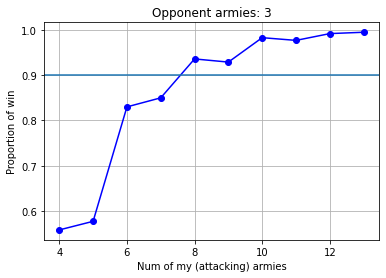

In [97]:
# Plotting 
fig, ax = plt.subplots(1,1)
x = num_my_armies
y = avg_win
ax.plot(x,y,'bo-')
ax.axhline(0.9) # Threshold 
ax.grid()
ax.set_title('Opponent armies: '+ str(num_opponent_armies))
ax.set_ylabel('Proportion of win')
ax.set_xlabel('Num of my (attacking) armies')

plt.show()